#co2 emission model

##Problem Statement

In [ ]:
# The fundamental goal here is to model the CO2 emissions as a function of several car engine features.


##Import Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


##Load Dataset

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/P265/co2_emissions.csv')

In [ ]:
data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


##EDA

In [ ]:
data.shape

(7385, 12)

In [ ]:
data.dtypes

make                               object
model                              object
vehicle_class                      object
engine_size                       float64
cylinders                           int64
transmission                       object
fuel_type                          object
fuel_consumption_city             float64
fuel_consumption_hwy              float64
fuel_consumption_comb(l/100km)    float64
fuel_consumption_comb(mpg)          int64
co2_emissions                       int64
dtype: object

In [ ]:
data.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [ ]:
data_description=data.describe()

In [ ]:
print(data_description)

       engine_size    cylinders  fuel_consumption_city  fuel_consumption_hwy  \
count  7385.000000  7385.000000            7385.000000           7385.000000   
mean      3.160068     5.615030              12.556534              9.041706   
std       1.354170     1.828307               3.500274              2.224456   
min       0.900000     3.000000               4.200000              4.000000   
25%       2.000000     4.000000              10.100000              7.500000   
50%       3.000000     6.000000              12.100000              8.700000   
75%       3.700000     6.000000              14.600000             10.200000   
max       8.400000    16.000000              30.600000             20.600000   

       fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  \
count                     7385.000000                 7385.000000   
mean                        10.975071                   27.481652   
std                          2.892506                    7.231879   
min

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [ ]:
"It comprises 7385 rows with 12 columns. The columns store various data types such as object, float64, and int64. The DataFrame consumes approximately 692.5 KB of memory."

'It comprises 7385 rows with 12 columns. The columns store various data types such as object, float64, and int64. The DataFrame consumes approximately 692.5 KB of memory.'

###Check Missing Values

In [ ]:
data_missing_values=data.isnull().sum()
print(data_missing_values)

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64


In [ ]:
'#This indicates that the dataset is complete, with no missing values present in any of the columns.'

'#This indicates that the dataset is complete, with no missing values present in any of the columns.'

###Checking Duplicates Values

In [ ]:
data.duplicated().sum()

1112

In [ ]:
# identifying duplicate data

duplicate_data = data[data.duplicated()]
duplicate_data

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M,X,7.9,5.9,7.0,40,163


In [ ]:
"There are 1112 duplicate values present in the DataFrame."

'There are 1112 duplicate values present in the DataFrame.'

In [ ]:
#Drop dplicates values
data.drop_duplicates(inplace=True)

In [ ]:
#After Duplicate values remove
data.duplicated().sum()

0

In [ ]:
# identifying duplicate data

data_without_duplicates = data[data.duplicated()]
data_without_duplicates

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions


In [ ]:
"After removing duplicate values, there are no duplicates remaining in the DataFrame."

'After removing duplicate values, there are no duplicates remaining in the DataFrame.'

In [ ]:
data.shape

(6273, 12)

###Handling Categoric values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6273 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            6273 non-null   object 
 1   model                           6273 non-null   object 
 2   vehicle_class                   6273 non-null   object 
 3   engine_size                     6273 non-null   float64
 4   cylinders                       6273 non-null   int64  
 5   transmission                    6273 non-null   object 
 6   fuel_type                       6273 non-null   object 
 7   fuel_consumption_city           6273 non-null   float64
 8   fuel_consumption_hwy            6273 non-null   float64
 9   fuel_consumption_comb(l/100km)  6273 non-null   float64
 10  fuel_consumption_comb(mpg)      6273 non-null   int64  
 11  co2_emissions                   6273 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [ ]:
print(data['make'].nunique())
print(data['model'].nunique())
print(data['vehicle_class'].nunique())
print(data['transmission'].nunique())
print(data['fuel_type'].nunique())


42
2053
16
5
5


In [ ]:
columns = ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']
for column in columns:
    unique_values = data[column].unique()
    print(f"{column}\n': {unique_values}")

make
': ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
model
': ['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
vehicle_class
': ['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
transmission
': ['AS' 'M' 'AV' 'AM' 'A']
fuel_type
': ['Z' 'D' 'X' 'E' 'N']


In [ ]:
# Changing the labels into a meaningful label.

In [ ]:
data["fuel_type"] = np.where(data["fuel_type"]=="Z", "Premium Gasoline", data["fuel_type"])
data["fuel_type"] = np.where(data["fuel_type"]=="X", "Regular Gasoline", data["fuel_type"])
data["fuel_type"] = np.where(data["fuel_type"]=="D", "Diesel", data["fuel_type"])
data["fuel_type"] = np.where(data["fuel_type"]=="E", "Ethanol(E85)", data["fuel_type"])
data["fuel_type"] = np.where(data["fuel_type"]=="N", "Natural Gas", data["fuel_type"])

In [ ]:
data["transmission"] = np.where(data["transmission"]=="AS", "Automatic with Select Shift", data["transmission"])
data["transmission"] = np.where(data["transmission"]=="M", "manual", data["transmission"])
data["transmission"] = np.where(data["transmission"]=="AV", "continuously variable", data["transmission"])
data["transmission"] = np.where(data["transmission"]=="AM", "automated manual", data["transmission"])
data["transmission"] = np.where(data["transmission"]=="A", "automatic", data["transmission"])

In [ ]:
for column in columns:
    print(f'{column}\n', data[column].value_counts(),'\n')

make
 FORD             575
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           274
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            159
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: make, dtype: int64 

model
 F-150 FFV             32
F-150 FFV 4X4         31
MUSTANG               26
FOC

####Frequency Distribution of different Categorical Variables

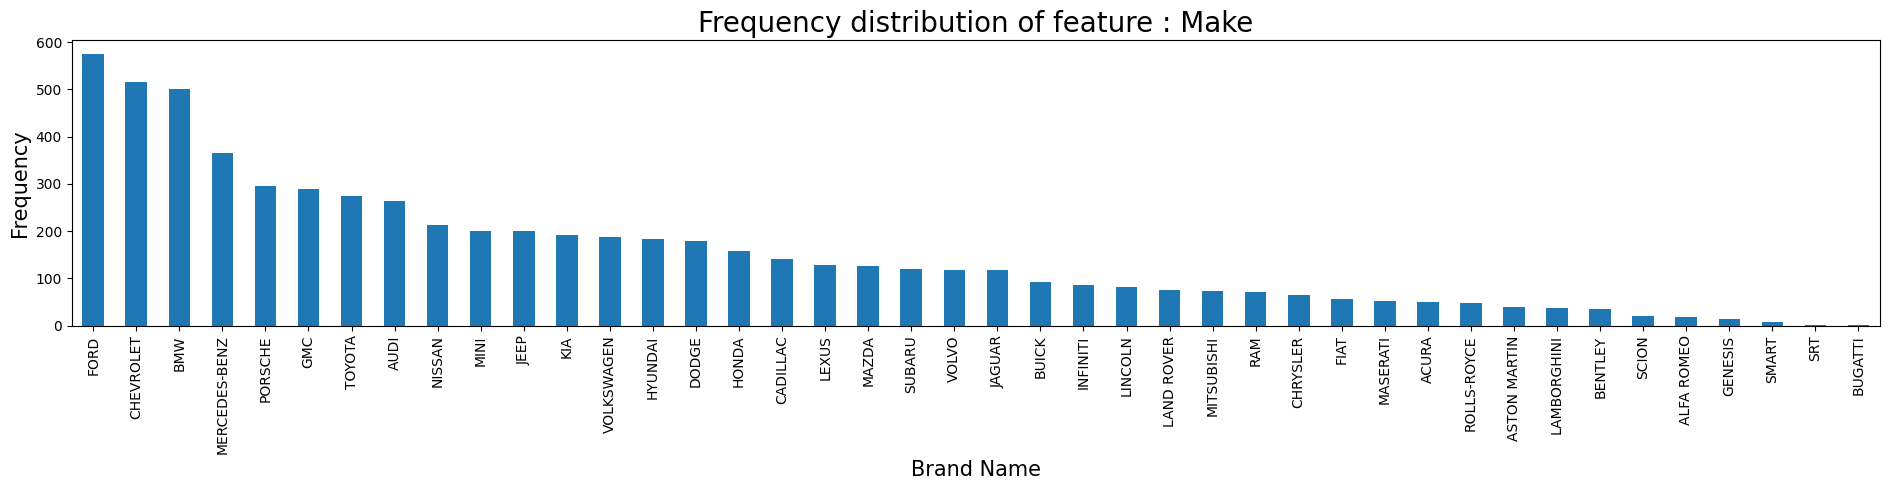

In [ ]:
plt.figure(figsize=(19,5));
data.groupby("make")["make"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : Make", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

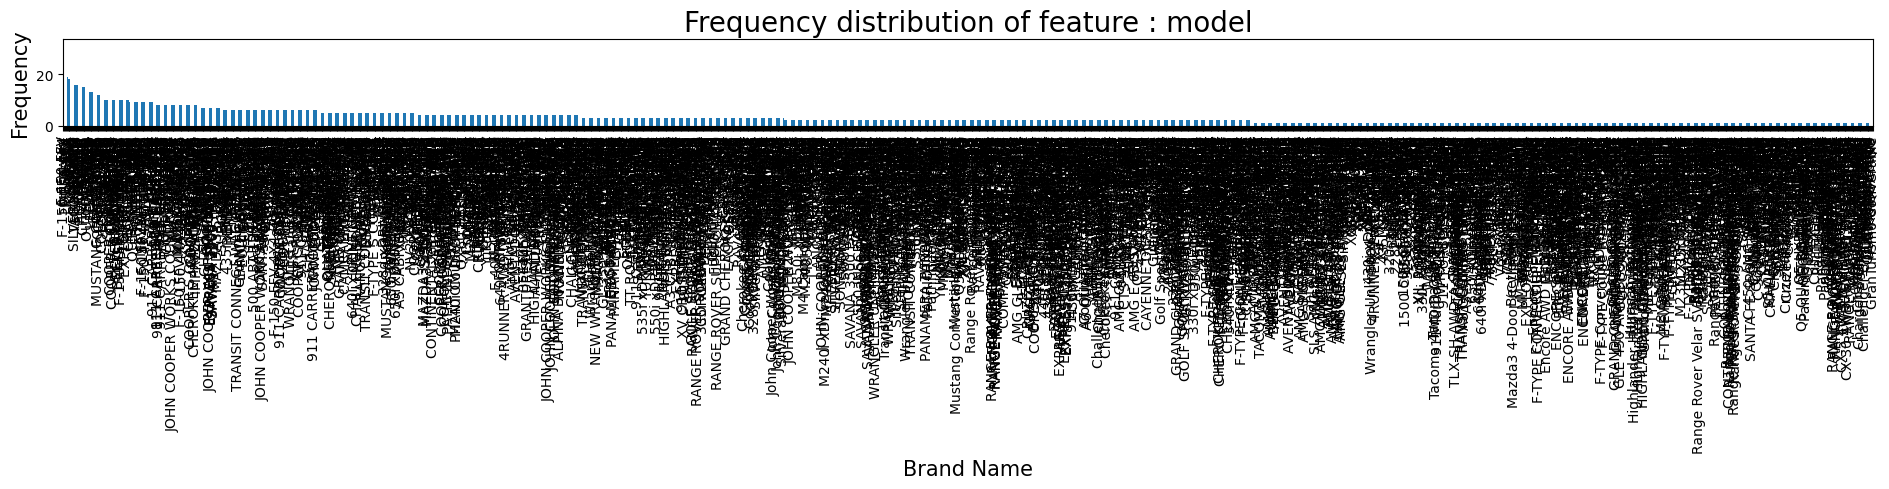

In [ ]:
plt.figure(figsize=(19,5));
data.groupby("model")["model"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : model", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

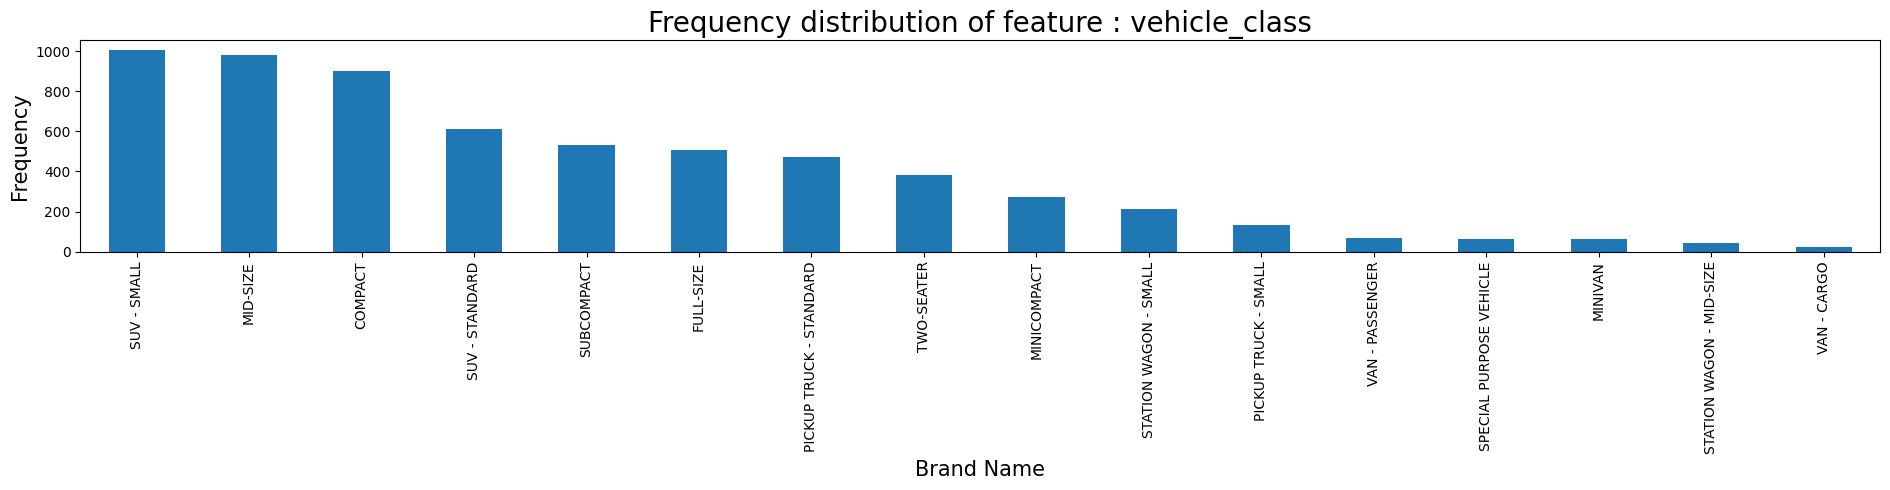

In [ ]:
plt.figure(figsize=(19,5));
data.groupby("vehicle_class")["vehicle_class"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : vehicle_class", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

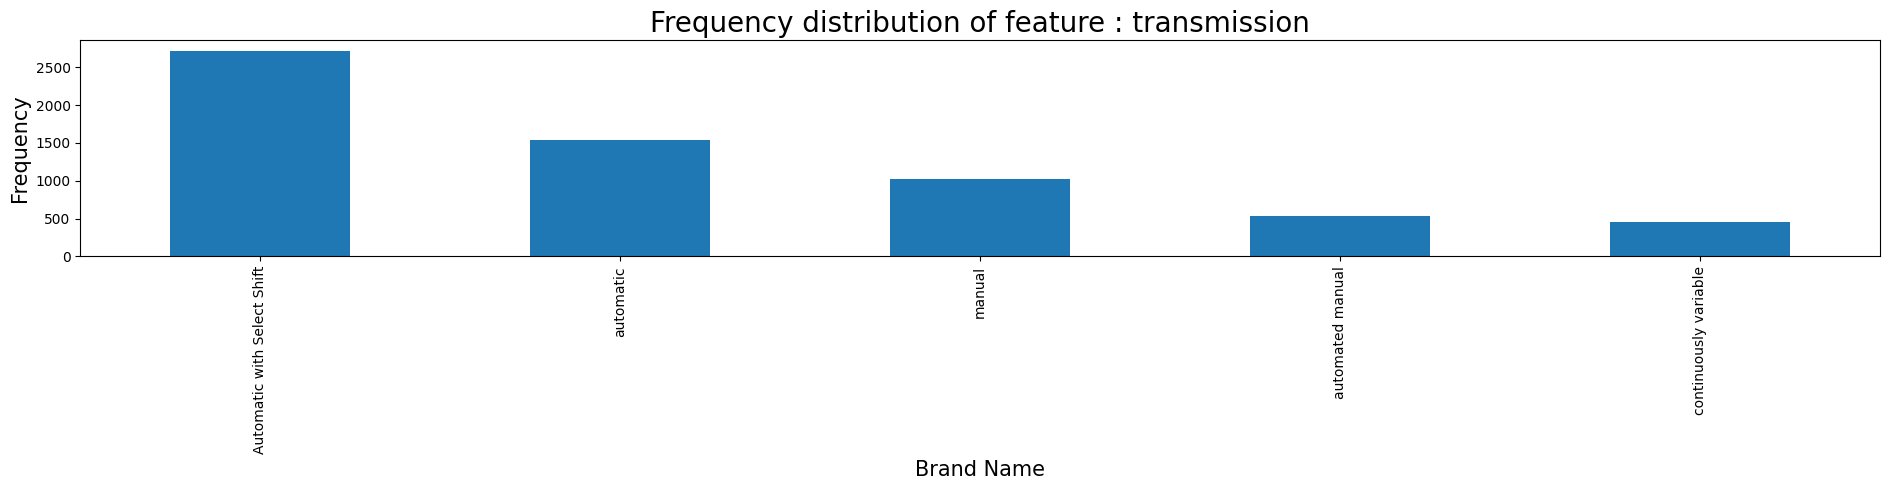

In [ ]:
plt.figure(figsize=(19,5));
data.groupby("transmission")["transmission"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : transmission", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

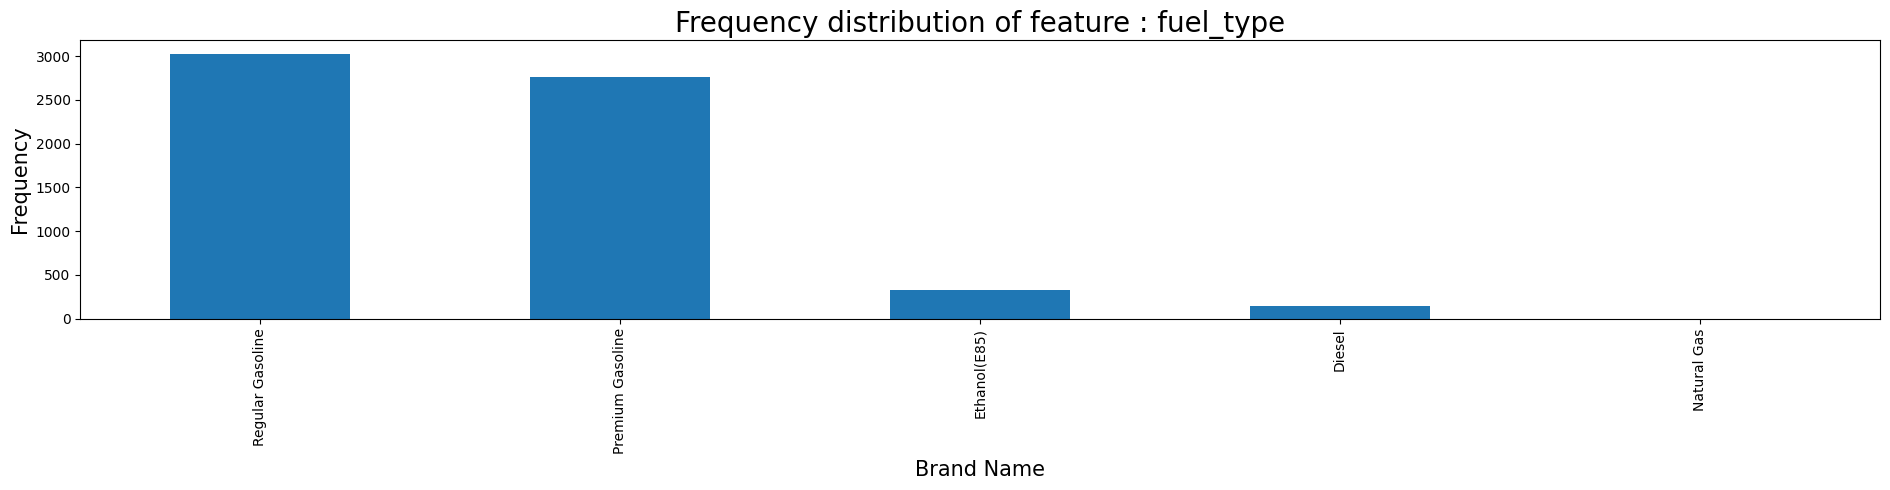

In [ ]:
plt.figure(figsize=(19,5));
data.groupby("fuel_type")["fuel_type"].count().sort_values(ascending=False).plot(kind="bar")
plt.title("Frequency distribution of feature : fuel_type", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Brand Name", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

####Converting categoric to numeric

In [ ]:
# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=['make', 'model', 'vehicle_class', 'transmission', 'fuel_type'])

# Label Encoding
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the DataFrame
data_encoded_label = data.copy()

label_encoder = LabelEncoder()
for column in ['make', 'model', 'vehicle_class', 'transmission', 'fuel_type']:
    data_encoded_label[column] = label_encoder.fit_transform(data_encoded_label[column])

# Output the encoded DataFrames
print("One-Hot Encoded DataFrame:")
print(data_encoded.head())

print("\nLabel Encoded DataFrame:")
print(data_encoded_label.head())

One-Hot Encoded DataFrame:
   engine_size  cylinders  fuel_consumption_city  fuel_consumption_hwy  \
0          2.0          4                    9.9                   6.7   
1          2.4          4                   11.2                   7.7   
2          1.5          4                    6.0                   5.8   
3          3.5          6                   12.7                   9.1   
4          3.5          6                   12.1                   8.7   

   fuel_consumption_comb(l/100km)  fuel_consumption_comb(mpg)  co2_emissions  \
0                             8.5                          33            196   
1                             9.6                          29            221   
2                             5.9                          48            136   
3                            11.1                          25            255   
4                            10.6                          27            244   

   make_ACURA  make_ALFA ROMEO  make_ASTON MART

In [ ]:
data_encoded_label.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,0,1057,0,2.0,4,0,3,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,4,3,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,3,3,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,0,3,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,0,3,12.1,8.7,10.6,27,244


In [ ]:
data_encoded_label.shape

(6273, 12)

In [ ]:
data_encoded_label.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6273 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            6273 non-null   int64  
 1   model                           6273 non-null   int64  
 2   vehicle_class                   6273 non-null   int64  
 3   engine_size                     6273 non-null   float64
 4   cylinders                       6273 non-null   int64  
 5   transmission                    6273 non-null   int64  
 6   fuel_type                       6273 non-null   int64  
 7   fuel_consumption_city           6273 non-null   float64
 8   fuel_consumption_hwy            6273 non-null   float64
 9   fuel_consumption_comb(l/100km)  6273 non-null   float64
 10  fuel_consumption_comb(mpg)      6273 non-null   int64  
 11  co2_emissions                   6273 non-null   int64  
dtypes: float64(4), int64(8)
memory usa

In [ ]:
#rename the dataframe
data2=data_encoded_label.copy()

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6273 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            6273 non-null   int64  
 1   model                           6273 non-null   int64  
 2   vehicle_class                   6273 non-null   int64  
 3   engine_size                     6273 non-null   float64
 4   cylinders                       6273 non-null   int64  
 5   transmission                    6273 non-null   int64  
 6   fuel_type                       6273 non-null   int64  
 7   fuel_consumption_city           6273 non-null   float64
 8   fuel_consumption_hwy            6273 non-null   float64
 9   fuel_consumption_comb(l/100km)  6273 non-null   float64
 10  fuel_consumption_comb(mpg)      6273 non-null   int64  
 11  co2_emissions                   6273 non-null   int64  
dtypes: float64(4), int64(8)
memory usa

##Visulization The Dataset

In [ ]:
data2.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,0,1057,0,2.0,4,0,3,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,4,3,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,3,3,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,0,3,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,0,3,12.1,8.7,10.6,27,244


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6273 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            6273 non-null   int64  
 1   model                           6273 non-null   int64  
 2   vehicle_class                   6273 non-null   int64  
 3   engine_size                     6273 non-null   float64
 4   cylinders                       6273 non-null   int64  
 5   transmission                    6273 non-null   int64  
 6   fuel_type                       6273 non-null   int64  
 7   fuel_consumption_city           6273 non-null   float64
 8   fuel_consumption_hwy            6273 non-null   float64
 9   fuel_consumption_comb(l/100km)  6273 non-null   float64
 10  fuel_consumption_comb(mpg)      6273 non-null   int64  
 11  co2_emissions                   6273 non-null   int64  
dtypes: float64(4), int64(8)
memory usa

###Histogram

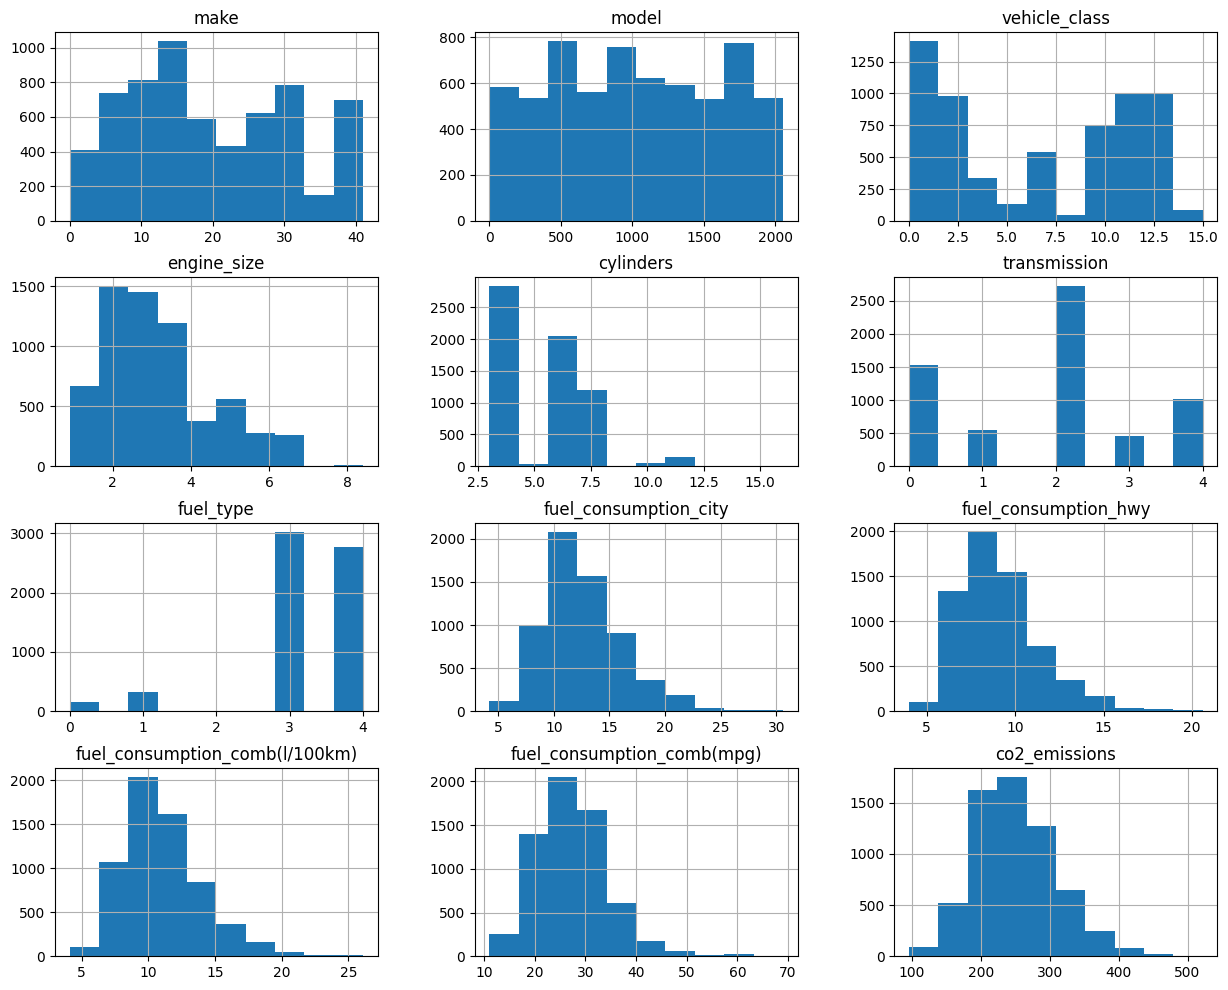

In [ ]:
# Histograms of numerical columns
data2.hist(figsize=(15, 12))
plt.show()

###Boxplot:Outlier tretment

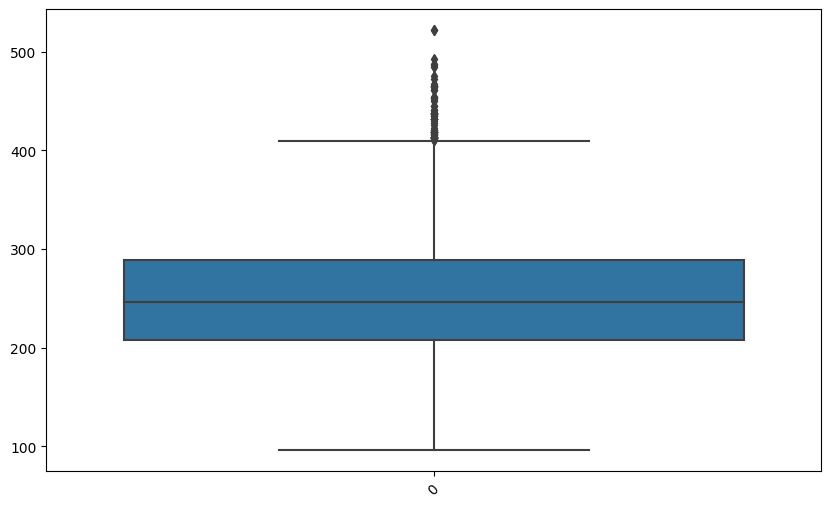

In [ ]:
# Box plots to identify outliers in numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data2['co2_emissions'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# IQR method to identify outliers in the 'co2_emissions' column
Q1 = data2['co2_emissions'].quantile(0.25)
print("Value of Q1 is :",Q1)
Q3 = data2['co2_emissions'].quantile(0.75)
print("Value of Q3 is :",Q3)
IQR = Q3 - Q1
print("IQR is :",IQR)
lower_bound = Q1 - 1.5 * IQR
print("Lower Bond is :",lower_bound)
upper_bound = Q3 + 1.5 * IQR
print("Upper Bond is :",upper_bound)

outliers = data2[(data2['co2_emissions'] < lower_bound) | (data2['co2_emissions'] > upper_bound)]

print("Outliers:")
print(outliers)

print(outliers.shape)

Value of Q1 is : 208.0
Value of Q3 is : 289.0
IQR is : 81.0
Lower Bond is : 86.5
Upper Bond is : 410.5
Outliers:
      make  model  vehicle_class  engine_size  cylinders  transmission  \
75       4   1261              2          6.8          8             2   
223      9    810             15          4.8          8             0   
224      9    810             15          6.0          8             0   
225      9    810             15          6.0          8             0   
226      9    812             15          4.8          8             0   
...    ...    ...            ...          ...        ...           ...   
5575     6    655             13          8.0         16             1   
6010    20   1032             12          6.2          8             0   
6045    22    391             13          6.5         12             1   
6046    22    392             13          6.5         12             1   
7058    22    391             13          6.5         12             1   

In [ ]:
import pandas as pd

# Assuming 'data2' is your original dataset containing the 'co2_emissions' column

# Calculate Q1, Q3, and IQR
Q1 = data2['co2_emissions'].quantile(0.25)
Q3 = data2['co2_emissions'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the original dataset to remove outliers
cleaned_data2 = data2[(data2['co2_emissions'] >= lower_bound) & (data2['co2_emissions'] <= upper_bound)]

# Print the cleaned dataset without outliers
print("Cleaned Dataset without outliers:")
print(cleaned_data2)


Cleaned Dataset without outliers:
      make  model  vehicle_class  engine_size  cylinders  transmission  \
0        0   1057              0          2.0          4             2   
1        0   1057              0          2.4          4             4   
2        0   1058              0          1.5          4             3   
3        0   1233             11          3.5          6             2   
4        0   1499             11          3.5          6             2   
...    ...    ...            ...          ...        ...           ...   
7380    41   1951             11          2.0          4             2   
7381    41   1957             11          2.0          4             2   
7382    41   1960             11          2.0          4             2   
7383    41   1968             12          2.0          4             2   
7384    41   1969             12          2.0          4             2   

      fuel_type  fuel_consumption_city  fuel_consumption_hwy  \
0            

In [ ]:
cleaned_data2

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,0,1057,0,2.0,4,2,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,4,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,3,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,2,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,2,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,2,4,10.7,7.7,9.4,30,219
7381,41,1957,11,2.0,4,2,4,11.2,8.3,9.9,29,232
7382,41,1960,11,2.0,4,2,4,11.7,8.6,10.3,27,240
7383,41,1968,12,2.0,4,2,4,11.2,8.3,9.9,29,232


In [ ]:
data3=cleaned_data2.copy()

In [ ]:
print(data2.shape)
print(outliers.shape)
print(data3.shape)

(6273, 12)
(74, 12)
(6199, 12)


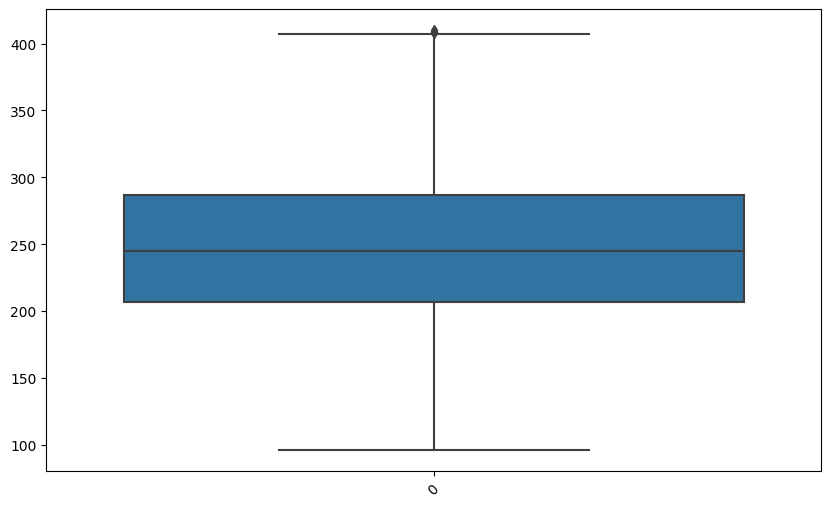

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data3['co2_emissions'])
plt.xticks(rotation=45)
plt.show()

###correlation

In [ ]:
#Correlation

corr=data3.corr()
corr

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
make,1.000000,0.031246,-0.020855,-0.140491,-0.162294,0.177783,0.037440,-0.199233,-0.123578,-0.175417,0.184976,-0.149683
model,0.031246,1.000000,0.214244,0.087113,0.069275,-0.017876,-0.080359,0.127644,0.185464,0.149501,-0.116042,0.132107
vehicle_class,-0.020855,0.214244,1.000000,0.129712,0.089639,-0.147512,-0.037164,0.222432,0.314617,0.257330,-0.268744,0.268121
engine_size,-0.140491,0.087113,0.129712,1.000000,0.929542,-0.319641,0.050586,0.828266,0.756481,0.813167,-0.754245,0.849456
cylinders,-0.162294,0.069275,0.089639,0.929542,1.000000,-0.280284,0.116757,0.798271,0.711087,0.777360,-0.717720,0.831599
transmission,0.177783,-0.017876,-0.147512,-0.319641,-0.280284,1.000000,0.174679,-0.339707,-0.341051,-0.344458,0.337668,-0.315985
fuel_type,0.037440,-0.080359,-0.037164,0.050586,0.116757,0.174679,1.000000,-0.089017,-0.146401,-0.110400,-0.007373,0.097942
fuel_consumption_city,-0.199233,0.127644,0.222432,0.828266,0.798271,-0.339707,-0.089017,1.000000,0.947370,0.993592,-0.934767,0.912599
fuel_consumption_hwy,-0.123578,0.185464,0.314617,0.756481,0.711087,-0.341051,-0.146401,0.947370,1.000000,0.977166,-0.894991,0.875649
fuel_consumption_comb(l/100km),-0.175417,0.149501,0.257330,0.813167,0.777360,-0.344458,-0.110400,0.993592,0.977166,1.000000,-0.932297,0.910766


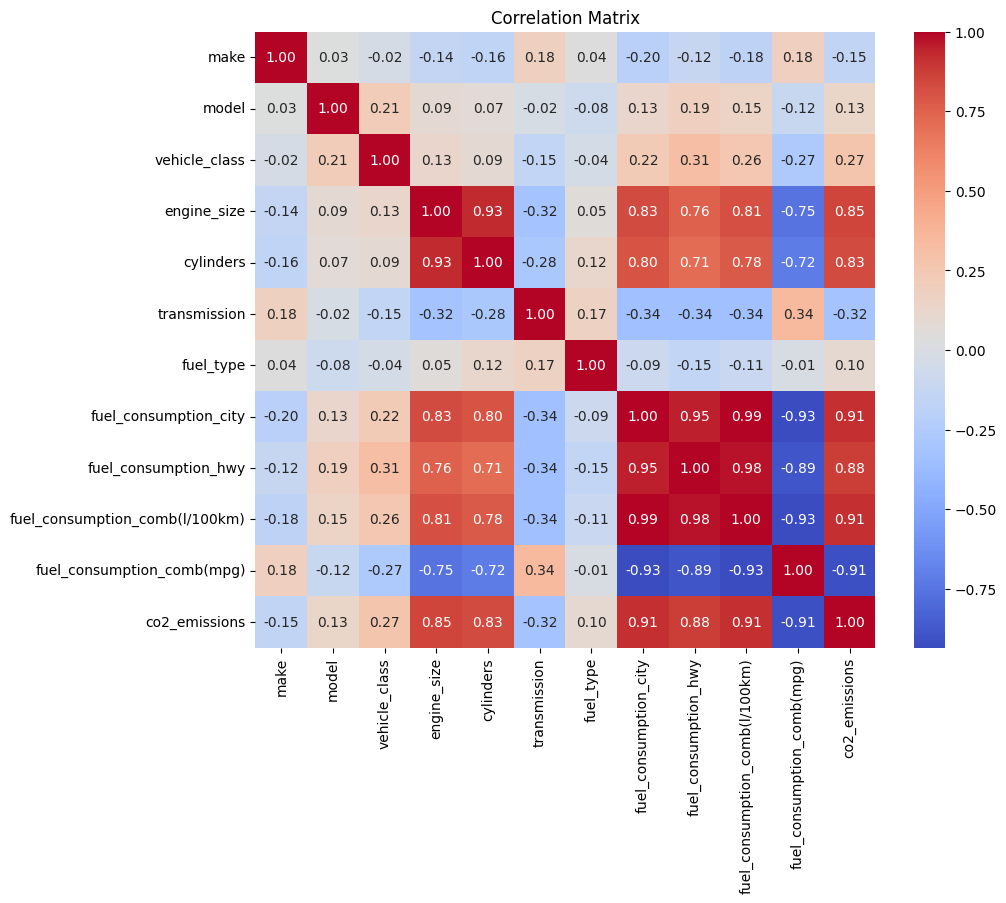

In [ ]:
# Correlation matrix to see relationships between numerical columns
correlation_matrix = data3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

###Scatter plot

In [ ]:
data3.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

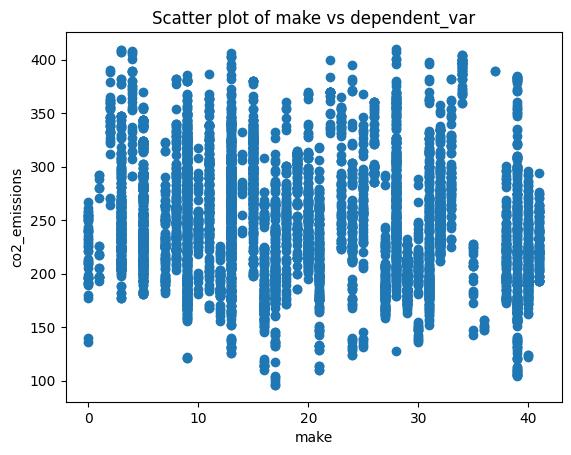

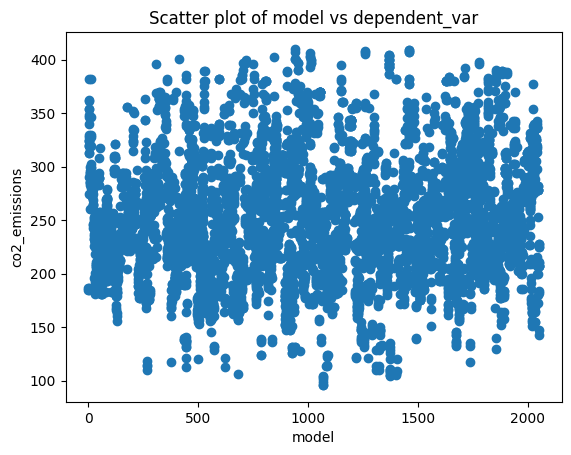

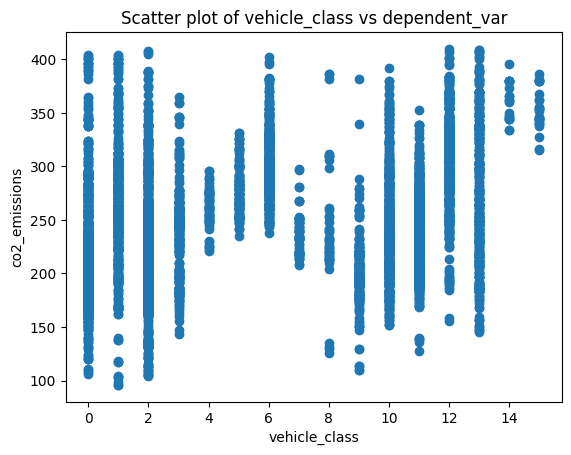

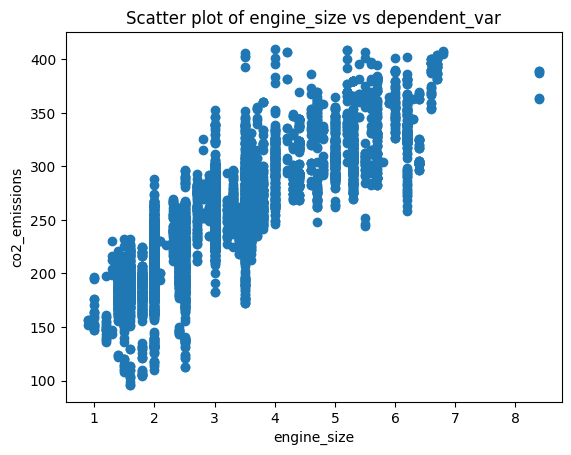

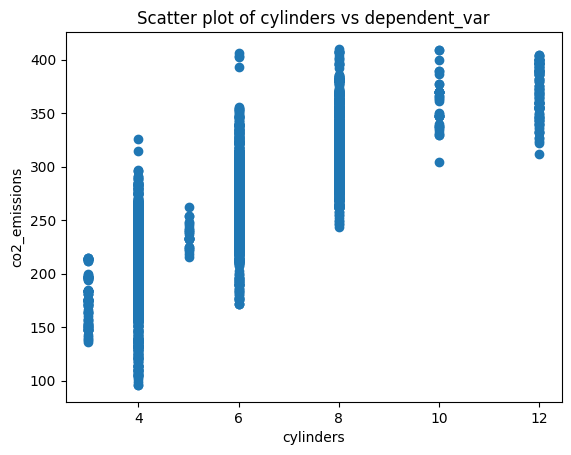

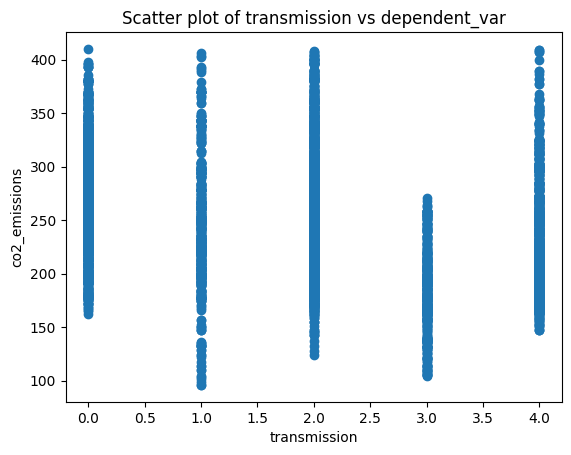

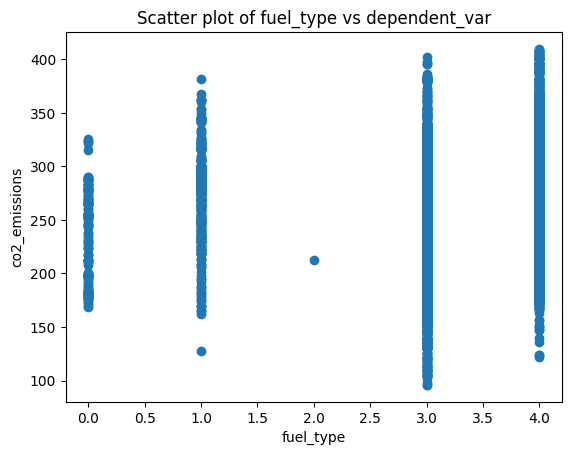

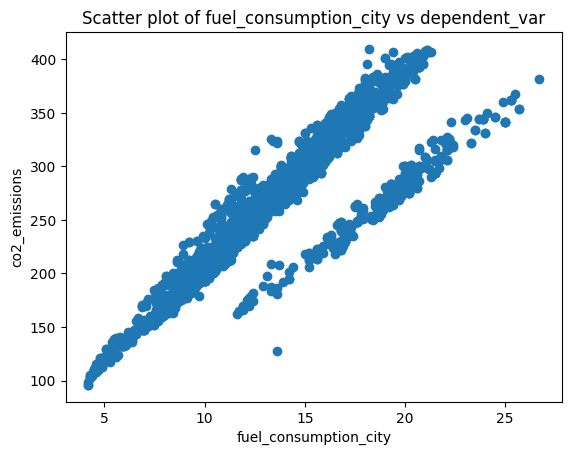

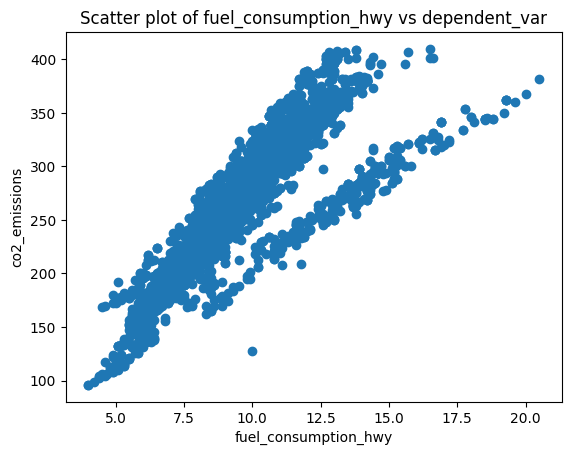

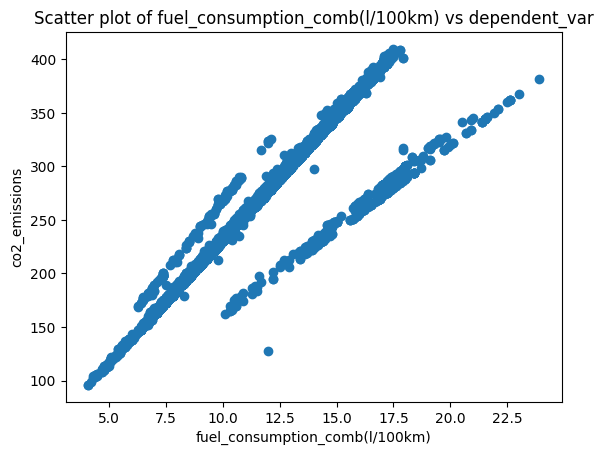

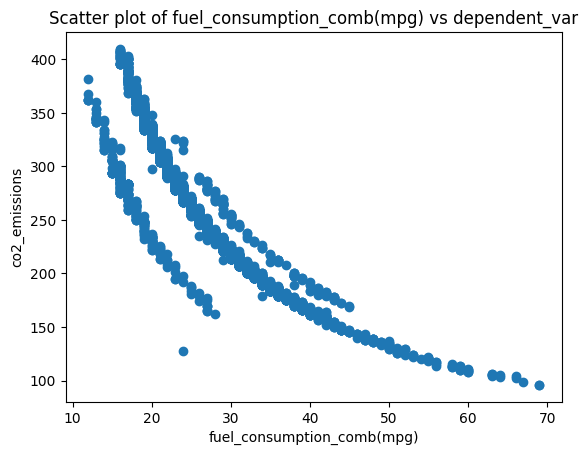

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
# Dependent variable 'y'
y = data3['co2_emissions']

# Independent variables
independent_vars = data3.iloc[:,0:11]

# Create individual scatter plots
for independent_var in independent_vars:
    x = data3[independent_var]
    plt.scatter(x, y)
    plt.xlabel(independent_var)
    plt.ylabel('co2_emissions')
    plt.title(f'Scatter plot of {independent_var} vs dependent_var')
    plt.show()



###Variation in CO2 emissions with different features

In [ ]:
data3.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

#####make

Text(0, 0.5, 'co2_emissions')

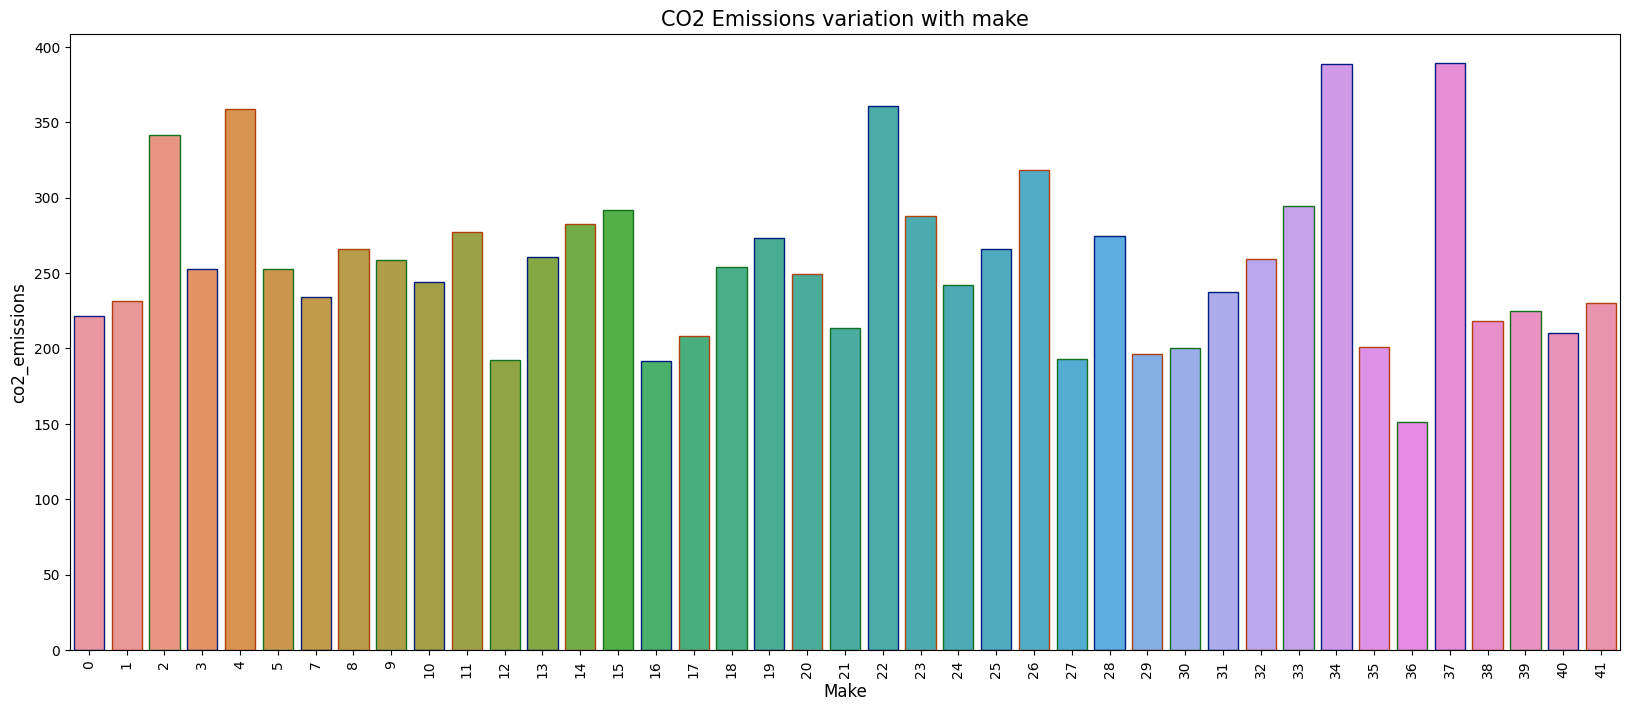

In [ ]:
CO2_make = data3.groupby(['make'])['co2_emissions'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "make",y="co2_emissions",data = CO2_make,edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with make', fontsize=15)
plt.xlabel('Make', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('co2_emissions', fontsize=12)

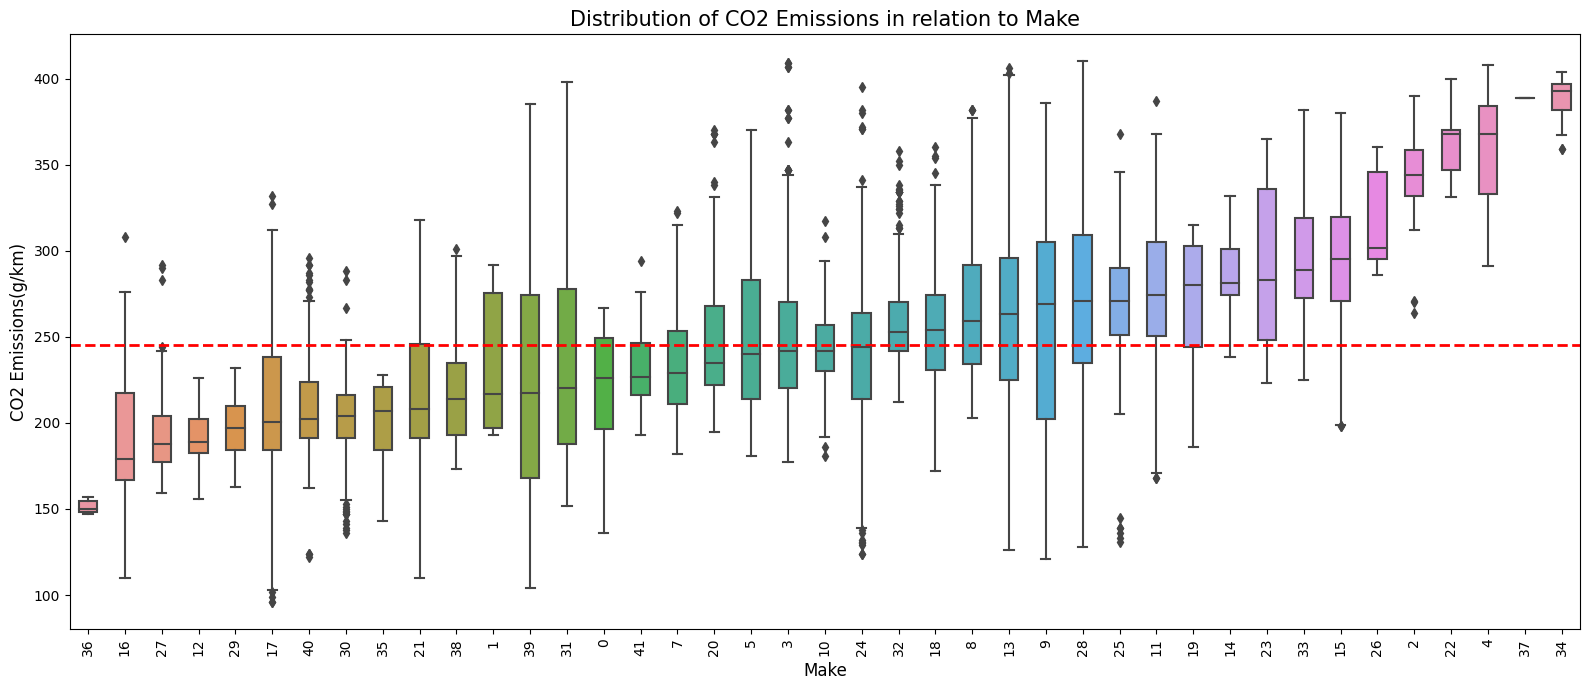

In [ ]:
plt.figure(figsize=(16,7))
order = data3.groupby("make")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="make", y="co2_emissions", data=data3, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(data3["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

#####Vehicle Class

Text(0, 0.5, 'co2_emissions')

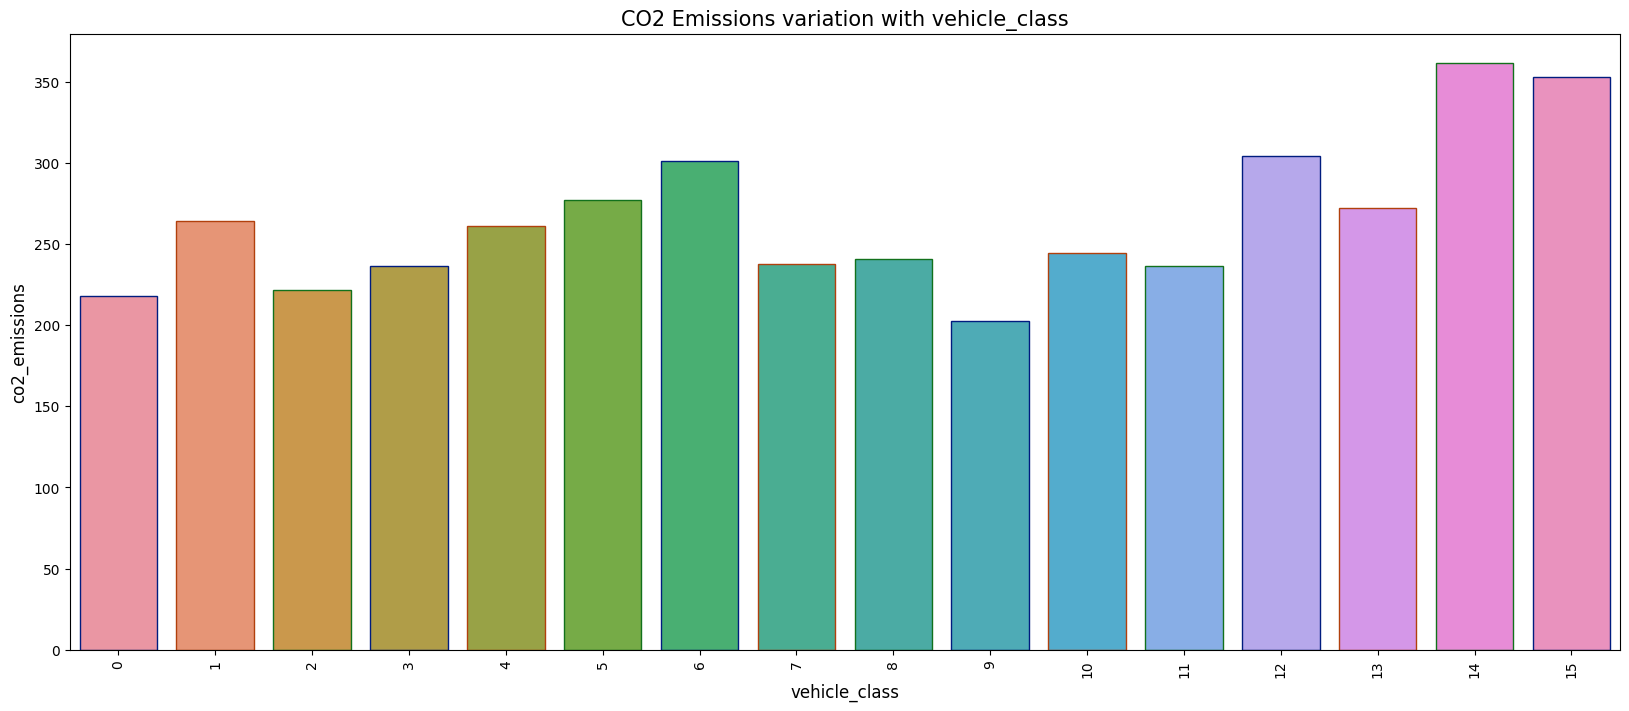

In [ ]:
CO2_vehicle_class = data3.groupby(['vehicle_class'])['co2_emissions'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "vehicle_class",y="co2_emissions",data = CO2_vehicle_class,edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with vehicle_class', fontsize=15)
plt.xlabel('vehicle_class', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('co2_emissions', fontsize=12)

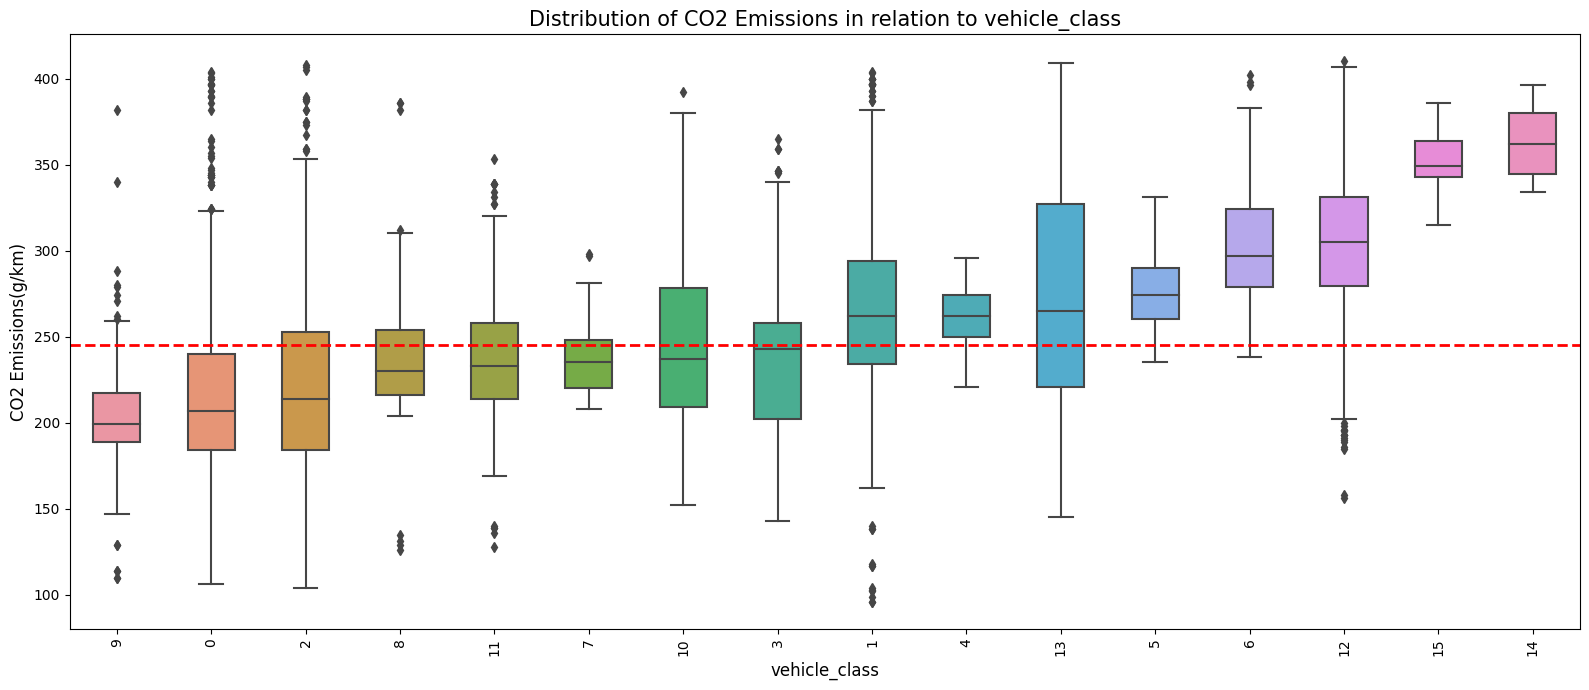

In [ ]:
plt.figure(figsize=(16,7))
order = data3.groupby("vehicle_class")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="vehicle_class", y="co2_emissions", data=data3, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to vehicle_class", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("vehicle_class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(data3["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

#####Transmission

Text(0, 0.5, 'co2_emissions')

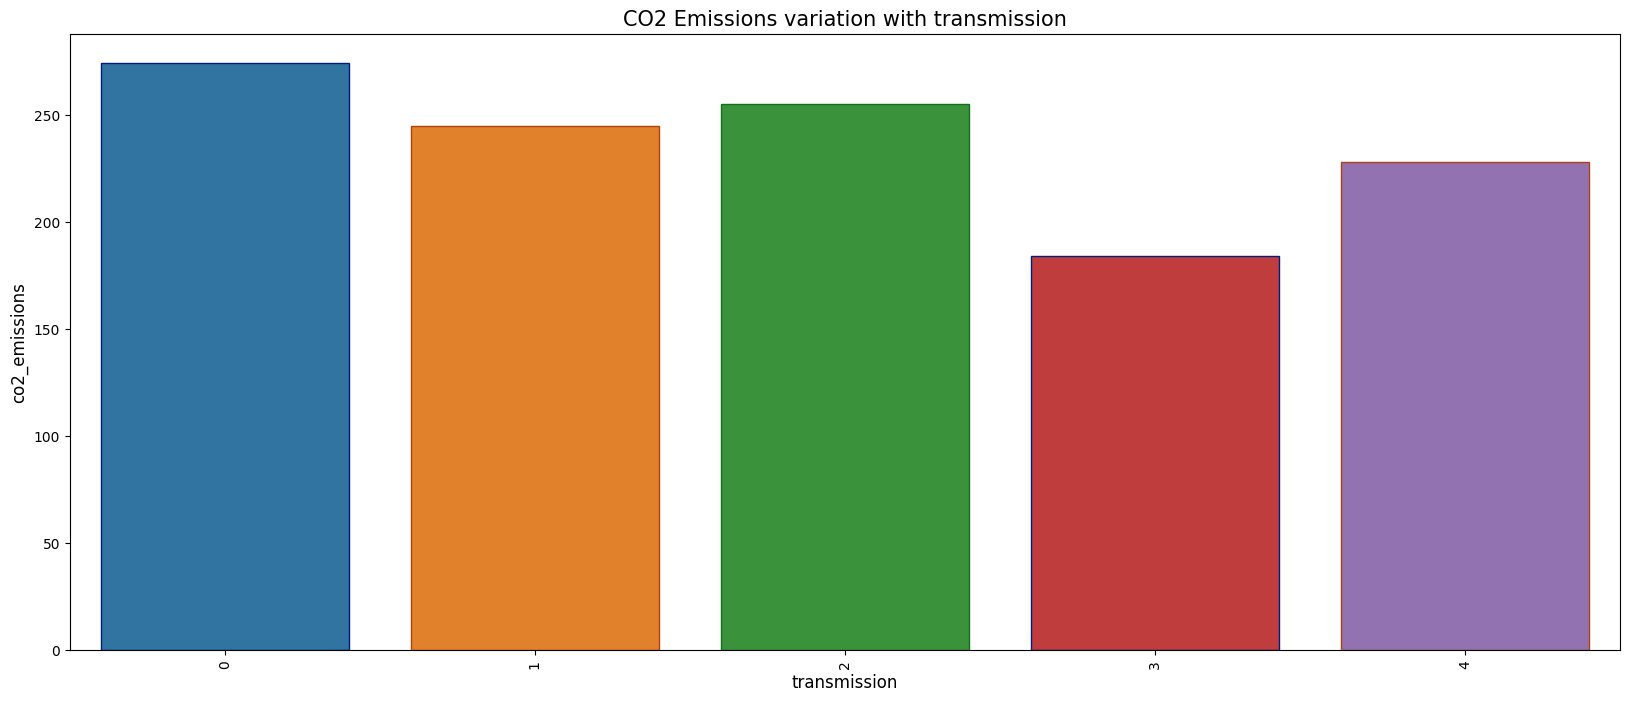

In [ ]:
CO2_transmission = data3.groupby(['transmission'])['co2_emissions'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "transmission",y="co2_emissions",data = CO2_transmission,edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with transmission', fontsize=15)
plt.xlabel('transmission', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('co2_emissions', fontsize=12)

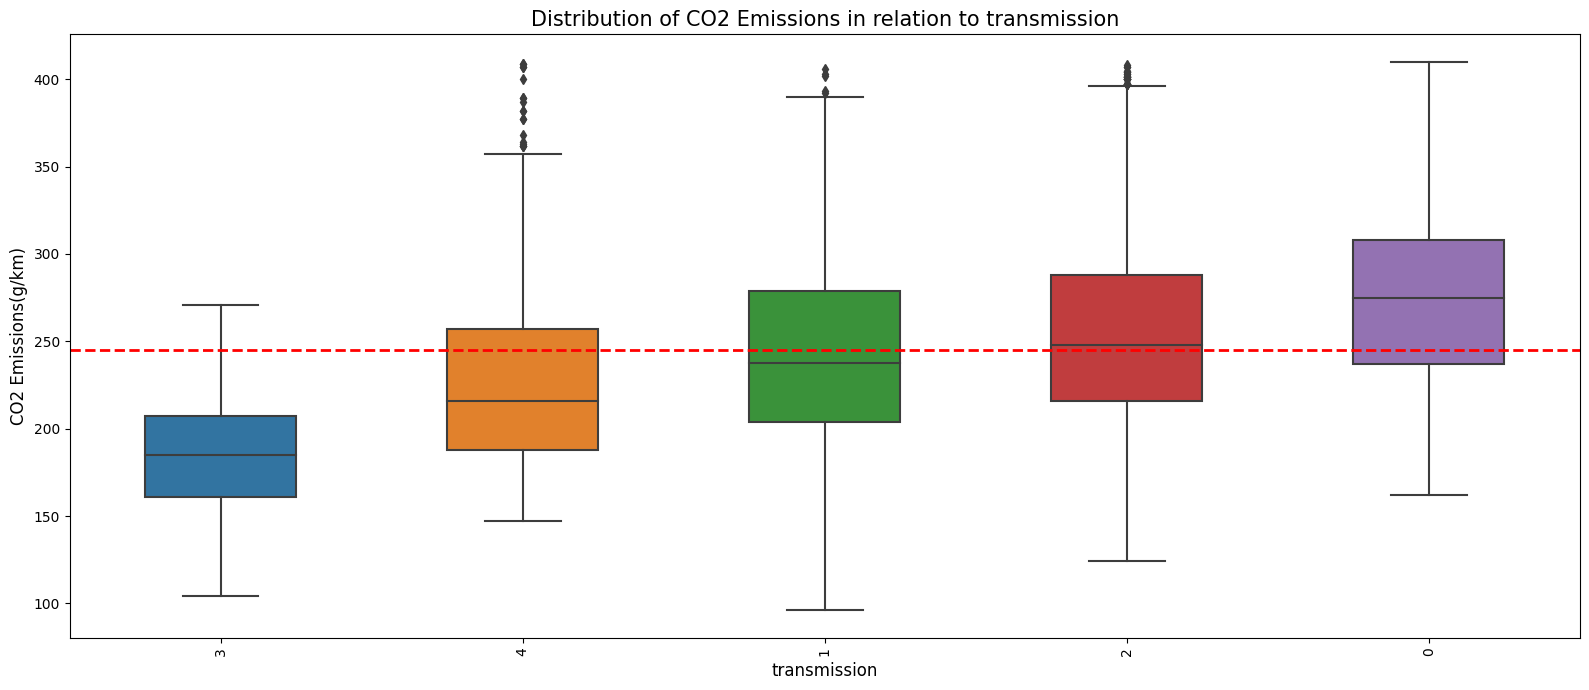

In [ ]:
plt.figure(figsize=(16,7))
order = data3.groupby("transmission")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="transmission", y="co2_emissions", data=data3, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to transmission", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("transmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(data3["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()

#####Fuel Type

Text(0, 0.5, 'co2_emissions')

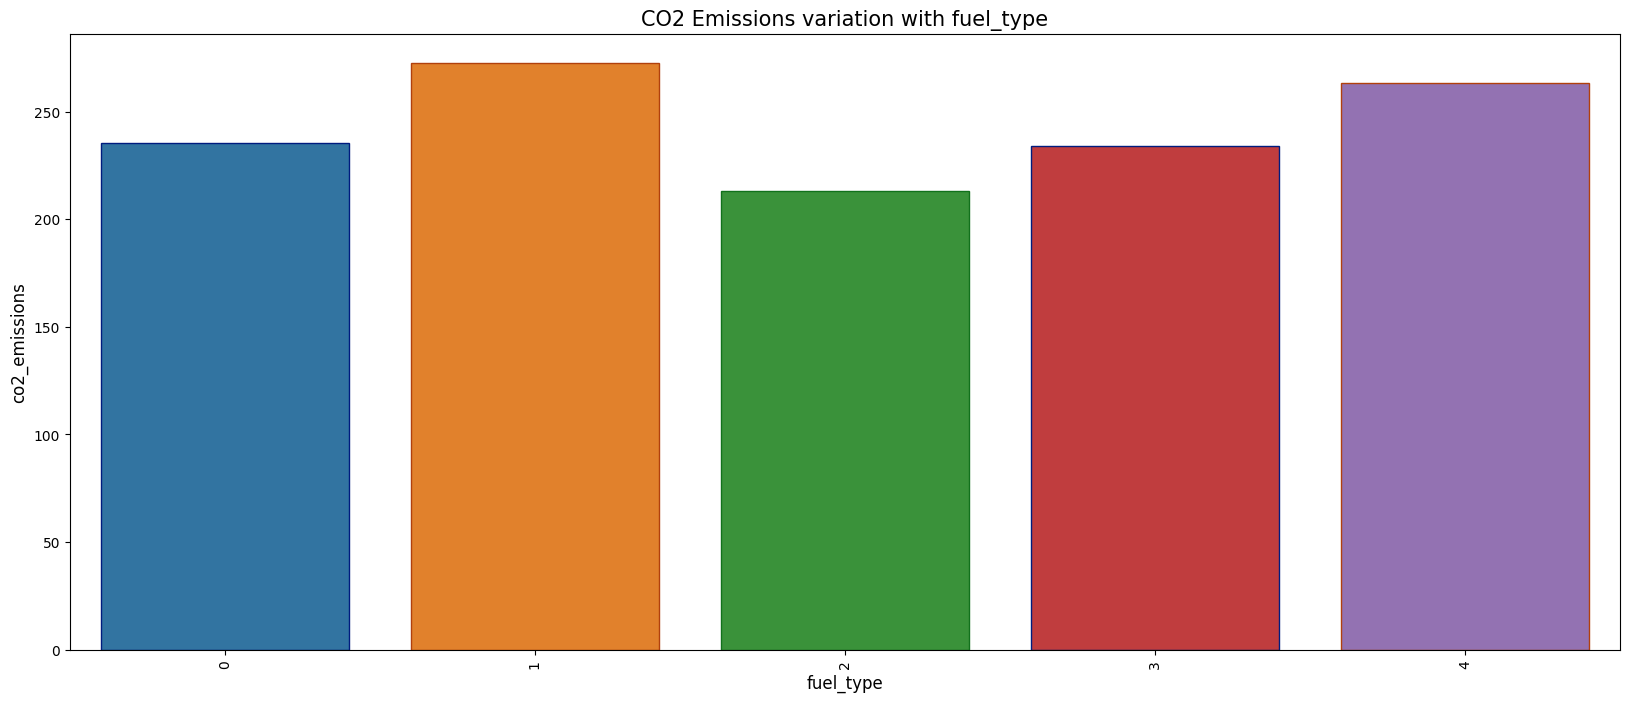

In [ ]:
CO2_fuel_type = data3.groupby(['fuel_type'])['co2_emissions'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20,8))
sns.barplot(x = "fuel_type",y="co2_emissions",data = CO2_fuel_type,edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with fuel_type', fontsize=15)
plt.xlabel('fuel_type', fontsize=12)
plt.xticks(rotation=90, horizontalalignment='center')
plt.ylabel('co2_emissions', fontsize=12)

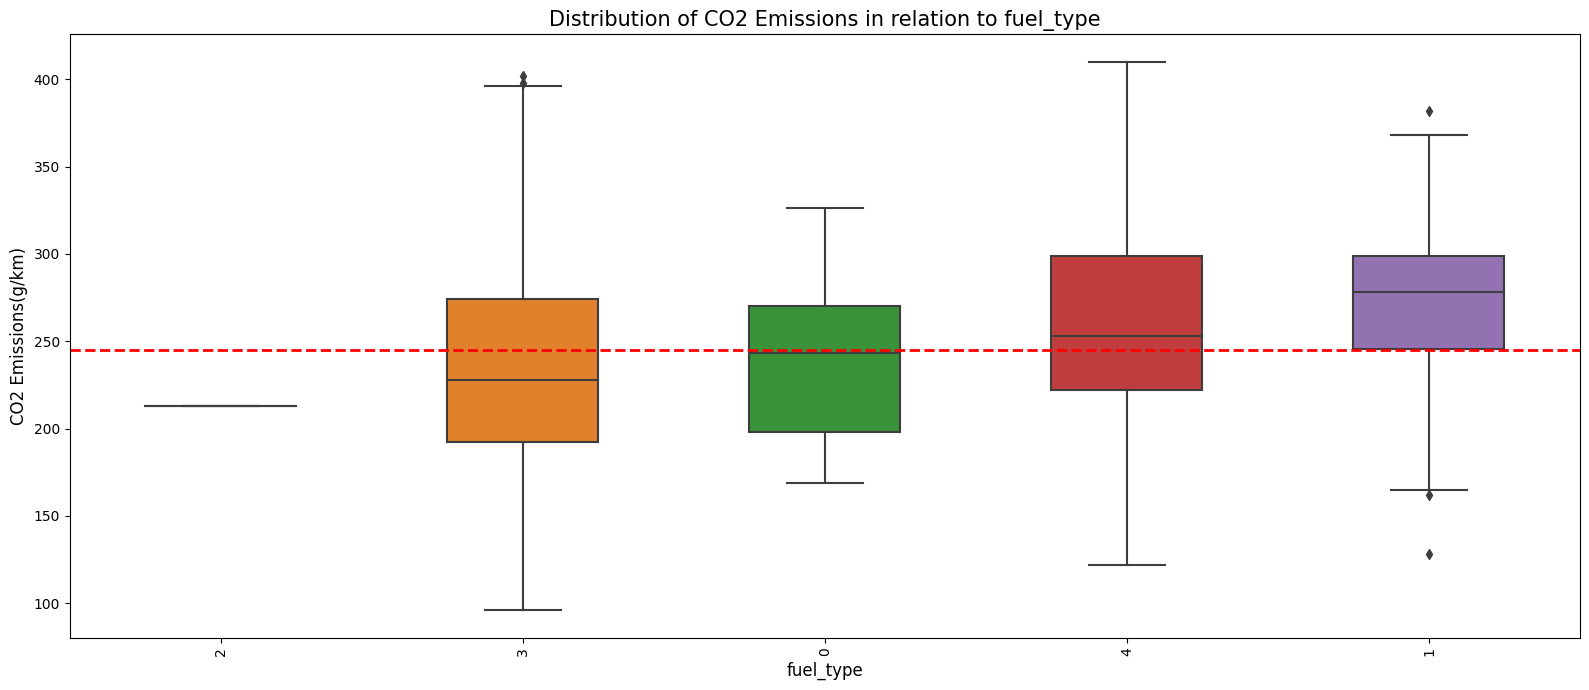

In [ ]:
plt.figure(figsize=(16,7))
order = data3.groupby("fuel_type")["co2_emissions"].median().sort_values(ascending=True).index
sns.boxplot(x="fuel_type", y="co2_emissions", data=data3, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to fuel_type", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("fuel_type", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(data3["co2_emissions"].median(),color='r',linestyle='dashed',linewidth=2)
plt.tight_layout()
plt.show()